#### import packages

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
from scipy import optimize

#### define tof resonance

In [31]:
def tof_res(df): 
    
    ToF = []
    counts = []
    x = []
    sigma = []
    time_offset = []
    
    for i in range(0, max(df['x_step_idx'])+1):
        
        df_i = df.loc[df['x_step_idx']==i]
        
        ToF.append(np.average(df_i['tof']))
        sigma.append(np.std(df_i['tof'])) #standard deviation of ToF
        x.append(i)
        counts.append(len(df_i['tof'])) 
        
        # turn df_i['step_value_ppg'] into a list
        # from this list, remove all [] brackets
        # make all values floats
        # get the average of them 
        
        time_offset.append(np.average([float(item.strip('[]')) for item in df_i['step_value_ppg'].str.split(',').str[0]]))
        
    return ToF, sigma, x, counts, time_offset

#### define sine function 

In [32]:
def test_func(x, a, b, c, d):
    return a * np.sin(b * (x+d)) + c

#### import dataset(s) and fit them with tof resonance function

In [33]:
df_1 = pd.read_csv("run44338.csv") 
#df_1 = df.loc[df['tof']<=130]

ToF_1, counts_1, x_1, sigma_1, time_offset_1 = tof_res(df_1)

time_offset_1 = np.array(time_offset_1)

guess_1 = [2, 840, 95, -10] 
params_1, params_covariance_1 = optimize.curve_fit(test_func, time_offset_1, ToF_1, guess_1)

print(params_1)
error_1 = np.sqrt(np.diag(params_covariance_1))

[ -2.5122982  766.90682057  97.64418752 -10.62279518]


In [34]:
df_2 = pd.read_csv("run44339.csv") 
#df_2 = df.loc[df['tof']<=130]

ToF_2, counts_2, x_2, sigma_2, time_offset_2 = tof_res(df_2)

time_offset_2 = np.array(time_offset_2)

guess_2 = [2, 840, 95, -10]
params_2, params_covariance_2 = optimize.curve_fit(test_func, time_offset_2, ToF_2, guess_2)

print(params_2)
error_2 = np.sqrt(np.diag(params_covariance_2))

[ -2.25334844 771.21411658  98.08707309 -10.75640041]


In [35]:
df_3 = pd.read_csv("run44340.csv") 
#df_3 = df.loc[df['tof']<=130]

ToF_3, counts_3, x_3, sigma_3, time_offset_3 = tof_res(df_3)

time_offset_3 = np.array(time_offset_3)

# amplitude, frequency, off set, phase
guess_3 = [-1, 740, 94, 2]
params_3, params_covariance_3 = optimize.curve_fit(test_func, time_offset_3, ToF_3, guess_3)

print(params_3)
error_3 = np.sqrt(np.diag(params_covariance_3))

[ -1.74033877 965.74150281  95.48643775   1.22734066]


In [36]:
df_4 = pd.read_csv("run44341.csv") 
#df_1 = df.loc[df['tof']<=130]

ToF_4, counts_4, x_4, sigma_4, time_offset_4 = tof_res(df_4)

time_offset_4 = np.array(time_offset_4)

# amplitude, frequency, off set, phase
guess_4 = [2, 900, 95, 2]
params_4, params_covariance_4 = optimize.curve_fit(test_func, time_offset_4, ToF_4, guess_4)

print(params_4)
error_4 = np.sqrt(np.diag(params_covariance_4))

[   1.59414707 1023.15304481   97.53351335    1.63254495]


In [37]:
df_5 = pd.read_csv("run44342.csv") 
#df_1 = df.loc[df['tof']<=130]

ToF_5, counts_5, x_5, sigma_5, time_offset_5 = tof_res(df_5)

time_offset_5 = np.array(time_offset_5)

# amplitude, frequency, off set, phase
guess_5 = [-7, 700, 94, 3]
params_5, params_covariance_5 = optimize.curve_fit(test_func, time_offset_5, ToF_5, guess_5)

print(params_5)
error_5 = np.sqrt(np.diag(params_covariance_5))

[   1.52610212 1061.17841142   94.85527225    1.61465582]


In [38]:
df_6 = pd.read_csv("run44343.csv") 
#df_1 = df.loc[df['tof']<=130]

ToF_6, counts_6, x_6, sigma_6, time_offset_6 = tof_res(df_6)

time_offset_6 = np.array(time_offset_6)

# amplitude, frequency, off set, phase
guess_6 = [3, 850, 95, 2]
params_6, params_covariance_6 = optimize.curve_fit(test_func, time_offset_6, ToF_6, guess_6)

print(params_6)
error_6 = np.sqrt(np.diag(params_covariance_6))

[  2.29276122 920.44137392  93.94087615   1.76446294]


In [39]:
df_7 = pd.read_csv("run44344.csv") 
#df_1 = df.loc[df['tof']<=130]

ToF_7, counts_7, x_7, sigma_7, time_offset_7 = tof_res(df_7)

time_offset_7 = np.array(time_offset_7)

# amplitude, frequency, off set, phase
guess_7 = [3, 850, 95, 2]
params_7, params_covariance_7 = optimize.curve_fit(test_func, time_offset_7, ToF_7, guess_7)

print(params_7)
error_7 = np.sqrt(np.diag(params_covariance_7))

[ -0.95831194 879.69106579  94.26269439   1.89832477]


#### plot tof resonance vs. x scan (in this case x scan is time offset)

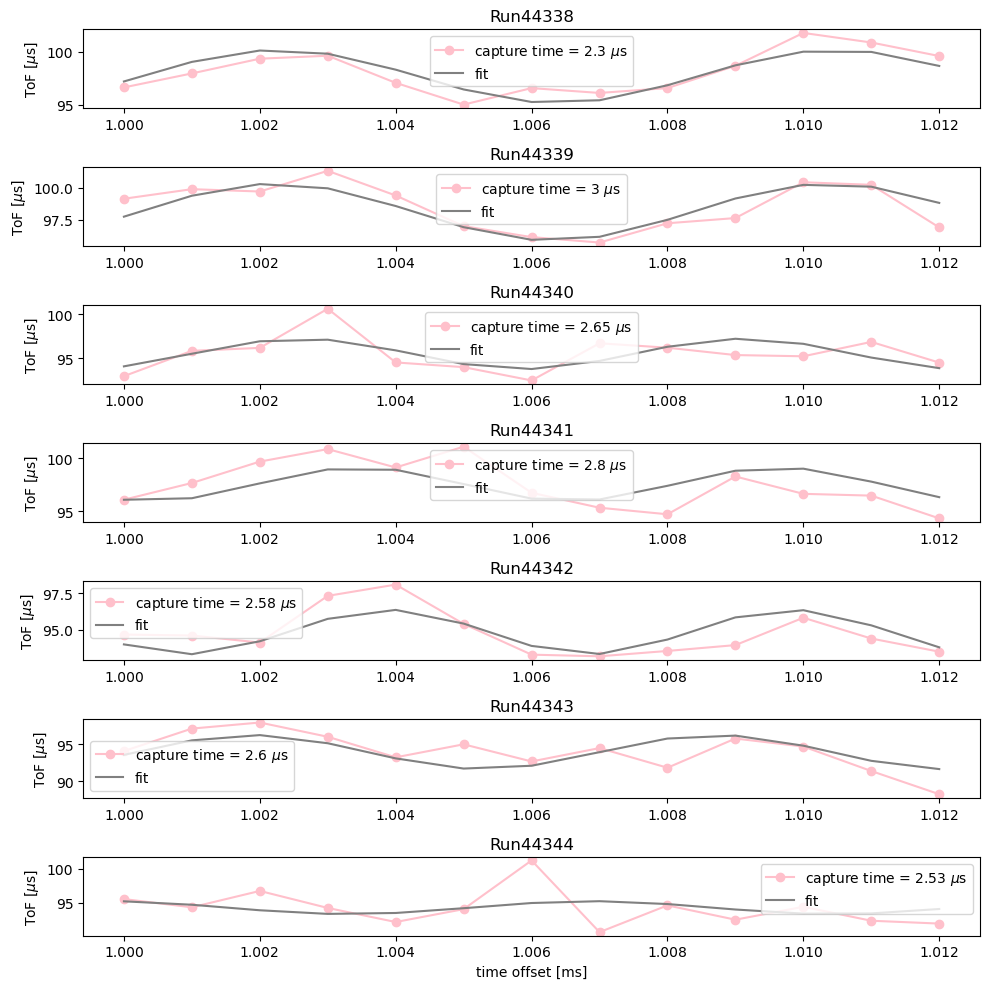

In [40]:
fig, axs = plt.subplots(7, figsize = [10,10])

axs[0].set_title('Run44338')
axs[0].plot(time_offset_1, ToF_1, marker = 'o', color='pink', label='capture time = 2.3 $\mu$s')
axs[0].plot(time_offset_1, test_func(time_offset_1, params_1[0], params_1[1], params_1[2], params_1[3]), label='fit', color='grey')
axs[0].set_ylabel('ToF [$\mu$s]')
axs[0].legend()

axs[1].set_title('Run44339')
axs[1].plot(time_offset_2, ToF_2, marker = 'o', color='pink', label='capture time = 3 $\mu$s')
axs[1].plot(time_offset_2, test_func(time_offset_2, params_2[0], params_2[1], params_2[2], params_2[3]), label='fit', color='grey')
axs[1].set_ylabel('ToF [$\mu$s]')
axs[1].legend()

axs[2].set_title('Run44340')
axs[2].plot(time_offset_3, ToF_3, marker = 'o', color='pink', label='capture time = 2.65 $\mu$s')
axs[2].plot(time_offset_3, test_func(time_offset_3, params_3[0], params_3[1], params_3[2], params_3[3]), label='fit', color='grey')
axs[2].set_ylabel('ToF [$\mu$s]')
axs[2].legend()

axs[3].set_title('Run44341')
axs[3].plot(time_offset_4, ToF_4, marker = 'o', color='pink', label='capture time = 2.8 $\mu$s')
axs[3].plot(time_offset_4, test_func(time_offset_4, params_4[0], params_4[1], params_4[2], params_4[3]), label='fit', color='grey')
axs[3].set_ylabel('ToF [$\mu$s]')
axs[3].legend()

axs[4].set_title('Run44342')
axs[4].plot(time_offset_5, ToF_5, marker = 'o', color='pink', label='capture time = 2.58 $\mu$s')
axs[4].plot(time_offset_5, test_func(time_offset_5, params_5[0], params_5[1], params_5[2], params_5[3]), label='fit', color='grey')
axs[4].set_ylabel('ToF [$\mu$s]')
axs[4].legend()

axs[5].set_title('Run44343')
axs[5].plot(time_offset_6, ToF_6, marker = 'o', color='pink', label='capture time = 2.6 $\mu$s')
axs[5].plot(time_offset_6, test_func(time_offset_6, params_6[0], params_6[1], params_6[2], params_6[3]), label='fit', color='grey')
axs[5].set_ylabel('ToF [$\mu$s]')
axs[5].legend()

axs[6].set_title('Run44344')
axs[6].plot(time_offset_7, ToF_7, marker = 'o', color='pink', label='capture time = 2.53 $\mu$s')
axs[6].plot(time_offset_7, test_func(time_offset_7, params_7[0], params_7[1], params_7[2], params_7[3]), label='fit', color='grey')
axs[6].set_ylabel('ToF [$\mu$s]')
axs[6].set_xlabel('time offset [ms]')
axs[6].legend()

#plt.savefig('Run44338-44344.png', dpi = 200)
plt.tight_layout()

Text(0.5, 1.0, 'oscillation amplitude vs. capture time')

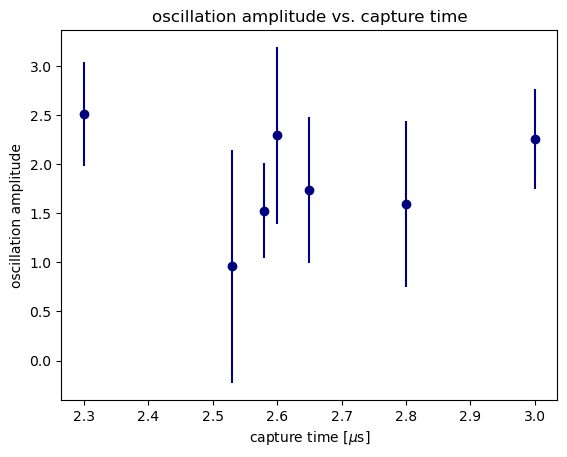

In [49]:
oscillation_amp = [np.abs(params_1[0]), np.abs(params_7[0]), np.abs(params_5[0]), np.abs(params_6[0]), np.abs(params_3[0]), np.abs(params_4[0]), np.abs(params_2[0])]
errors = [error_1[0], error_7[0], error_5[0], error_6[0] , error_3[0], error_4[0], error_2[0]]

capture_time = [2.3, 2.53, 2.58, 2.6, 2.65, 2.8, 3]

plt.errorbar(capture_time, oscillation_amp, errors, color='navy', marker='o', ls='none')
plt.xlabel('capture time [$\mu$s]')
plt.ylabel('oscillation amplitude')
plt.title('oscillation amplitude vs. capture time')